In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import wandb
from keras.datasets import fashion_mnist
from PIL import Image

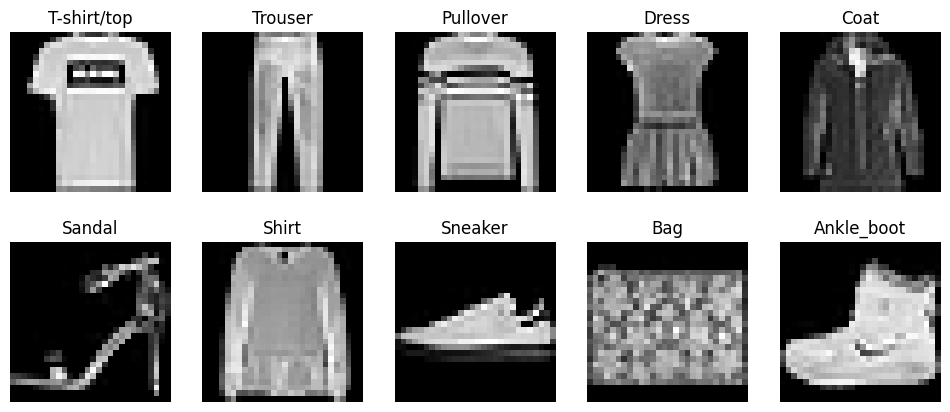

In [16]:
# Initialize wandb
wandb.init(project="fashion-mnist-classes")

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Class labels in Fashion-MNIST
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle_boot"
]
plt.figure(figsize=[12, 5])

# Select one image per class
sample_images = {}
st = set()
for x,y in zip(x_train,y_train):
    if y in st:
      continue
    else:
      st.add(y)
      sample_images[class_labels[y]] = wandb.Image(x)
      plt.subplot(2, 5, y+1)
      plt.imshow(x, cmap='gray')
      plt.axis('off')
      plt.title(class_labels[y])

# Log images to wandb
wandb.log({"fashion-mnist-classes": [wandb.Image(img,caption=caption) for caption,img in sample_images.items()]})

# Finish wandb run API Key: f659082c2b19bf3ffaaceceb36c1e280541f6b11
wandb.finish()